# Análisis de algoritmos


## Secuencia de Fibonacci

La secuencia Fibonacci se genera con la suma de sus dos predecesores inmediatos

$$0,1,1,2,3,5,8,13,21,34,... ,$$

Más formalmente, los números de Fibonacci Fn son generado por la regla simple

$$F_{n} =
\left\{
\begin{matrix}
1 & \mbox{si } n=1\\
         0 & \mbox{si } n=1\\
         F_{n−1} + F_{n−2} & \mbox{si } n > 1 \\
\end{matrix}
\right.$$

Los números de Fibonacci crecen casi tan rápido como las potencias de 2: por ejemplo, $F^{30}$ es
más de un millón, y $F^{100}$ ya tiene 21 dígitos.
En general, $F^{n} \approx 20.694^n$.
Pero, ¿cuál es el valor exacto de $F^{100}$ o de $F^{100}$? 


## Un algoritmo exponencial
Una idea es implementar la definición **recursiva** de Fn:


In [4]:
def fib1(n):

    if n == 0: 
        return 0

    if n == 1: 
        return 1

    return fib1(n-1) + fib1(n-2)

fib1(3)

2

Siempre que tenemos un algoritmo, hay tres preguntas que siempre nos hacemos al respecto:
1. ¿Es correcto?
2. ¿Cuánto tiempo toma, en función de n? (**eficiencia**)
3. ¿Podemos hacerlo mejor?


<span style='color:green'> 1. ¿Es correcto? </span> 

Este algoritmo es precisamente la definición de Fn de Fibonacci.  <span style='color:red'> $\checkmark$</span>

<span style='color:green'> 2. ¿Cuánto tiempo toma, en función de n?</span> 

Sea T(n) el número de pasos de computadora necesarios para calcular fib1(n); ¿Qué podemos decir de esta función?

Si n es menor que 2, el procedimiento se detiene casi inmediatamente, después de solo un par de pasos.

Por lo tanto,

$$ T(n) \leq 2 \text{ para } n \leq1.$$


Para valores mayores de n, hay dos invocaciones recursivas de fib1, que toman el tiempo T(n −1) y
T(n−2), respectivamente, más tres pasos de computadora.

Por lo tanto,

$$T(n) = T(n −1) + T(n −2) + 3 \text{ para } n > 1.$$

Compare esto con la relación de recurrencia para Fn: inmediatamente vemos que $T(n) ≥Fn$.

Esta es una muy mala noticia: ¡el tiempo de ejecución del algoritmo crece tan rápido como los números de Fibonacci!

  <span style='color:red'>T(n) es exponencial en n</span> , lo que implica que el algoritmo es imprácticamente lento excepto para valores muy pequeños de n.

Seamos un poco más concretos sobre lo malo que es el tiempo exponencial.

Para calcular F200, el algoritmo fib1 ejecuta $T(200) \geq F^{200} \geq 2^{138}$ pasos computacionales elementales. El tiempo que realmente toma depende, por supuesto, de la computadora utilizada. Para el NEC Earth Simulator, que registra 40 billones de pasos por segundo, fib1(200) tardaría al menos $2^{92}$ segundos.

Pero la tecnología está mejorando rápidamente, las velocidades de las computadoras se han duplicado aproximadamente cada 18 meses, un fenómeno que a veces se denomina ley de Moore. Con este extraordinario crecimiento, quizás fib1 funcione mucho más rápido en las máquinas del próximo año. Veamos: el tiempo de ejecución de fib1(n) es proporcional a $2^{0,694n} ≈ (1,6)n$, por lo que se tarda 1,6 veces más en calcular Fn+1 que Fn.

Y según la ley de Moore, las computadoras se vuelven aproximadamente 1,6 veces más rápidas cada año. Por tanto, si podemos calcular razonablemente $F^{100}$ con la tecnología de este año, el año que viene gestionaremos $F^{101}$. Y al año siguiente, $F^{102}$. Y así sucesivamente: ¡solo un número de Fibonacci más cada año! Tal es la maldición del tiempo exponencial.

En resumen, nuestro ingenuo algoritmo recursivo es correcto pero irremediablemente ineficiente.

<span style='color:green'> 3. ¿Podemos hacerlo mejor?</span>

## Un algoritmo polinomial

Tratemos de entender por qué fib1 es tan lento. La siguiente figura muestra la cascada de invocaciones recursivas desencadenadas por una sola llamada a fib1(n). ¡Observe que muchos cálculos se repiten!

Un esquema más sensato almacenaría los resultados intermedios, los valores F0,F1,...,Fn−1, tan pronto como se conozcan.

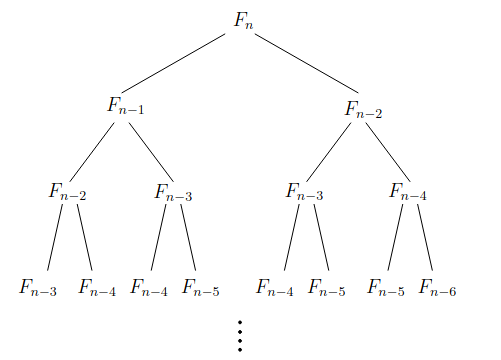

In [5]:
from IPython.display import Image
Image("Images/Fn.png")

In [9]:
import numpy as np
def fib2(n):
    if n == 0: return 0
    if n == 1: return 1
    f = np.arange(0,n+1)
    f[0] = 0
    f[1] = 1
    for i in np.arange(2,n+1):
        f[i] = f[i-1] + f[i-2]
    return f[n]
fib2(3)

2

571 / 5.000


<span style='color:green'> 1. ¿Es correcto? </span> 

Al igual que con fib1, la corrección de este algoritmo es evidente porque usa directamente la definición de Fn. <span style='color:rojo'> $\checkmark$</span>

<span style='color:green'> ¿Cuánto tiempo lleva? </span>

El ciclo interno consta de un solo paso de computadora y se ejecuta n −1 veces. Por lo tanto, el número de pasos de computadora utilizados por fib2 es lineal en n.

De exponencial pasamos a polinomio, un gran avance en el tiempo de ejecución. Esto es ahora
perfectamente razonable calcular $F^{200}$ o incluso $F^{200.000}$

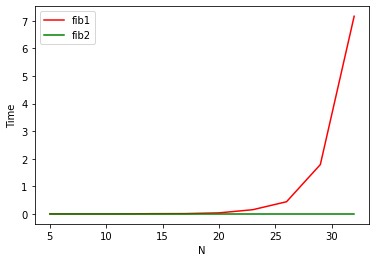

In [10]:
import time
import matplotlib.pyplot as plt


N = np.arange(5,35,3)
t_fib1 = []
t_fib2 = []

def time_fib(i,t_fib,fib):
    t0 = time.time()
    fib(i)
    tf = time.time() - t0
    t_fib.append(tf)
    return t_fib

for i in N:
    t_fib1 = time_fib(i,t_fib1,fib1)
    t_fib2 = time_fib(i,t_fib2,fib2)


plt.plot(N, t_fib1, color='r', label='fib1')
plt.plot(N, t_fib2, color='g', label='fib2')
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("N")
plt.ylabel("Time")
plt.legend()
plt.show()

Hemos estado contando el número de pasos básicos de computadora ejecutados por cada algoritmo y pensando que estos pasos básicos toman una cantidad constante de tiempo.

Es razonable tratar la suma como un solo paso de computadora si se están sumando números pequeños, digamos números de 32 bits. Pero el n-ésimo número de Fibonacci tiene una longitud de aproximadamente $0,694n$ bits, y puede superar con creces los 32 a medida que n crece. Es imposible realizar operaciones aritméticas con números arbitrariamente grandes en un solo paso de tiempo constante.

Necesitamos revisar las estimaciones de tiempo de ejecución anteriores y hacerlas más honestas.

La suma de dos números de n bits lleva un tiempo aproximadamente proporcional a n. Por lo tanto, fib1, que realiza sumas de Fn, en realidad utiliza una serie de pasos básicos aproximadamente proporcionales a nFn. Asimismo, el número de pasos que da fib2 es proporcional a $n^2$, todavía polinomial en n y por tanto exponencialmente superior a fib1. Esta corrección del análisis del tiempo de ejecución no disminuye nuestro avance.

Pero <span style='color:green'> 3. ¿Podemos hacerlo mejor que fib2?</span>


## Notación asintótica

La ejecución de un algóritmo se puede expresar en términos de pasos informáticos básicos, el tiempo que lleva uno de esos pasos depende de manera crucial del procesador en particular e incluso de detalles como la estrategia de almacenamiento en caché (como resultado de lo cual el tiempo de ejecución puede diferir sutilmente de una ejecución)

Por lo tanto, es importante buscar una caracterización independiente de la máquina que nos muestre la eficiencia de un algoritmo. Con este fin, siempre expresaremos el tiempo de ejecución contando el número de pasos básicos de la computadora, en función del tamaño de la entrada.

En lugar de informar que un algoritmo toma, digamos, $5n^3 + 4n + 3$ pasos en una entrada de tamaño n, es mucho más simple omitir términos de orden inferior como 4n y 3 (que se vuelven insignificantes a medida que n crece ), e incluso el detalle del coeficiente 5 en el término principal, y solo decir que el algoritmo toma tiempo $\mathcal{O}(n^3 )$.

Dadas dos funciones $f,g: R\rightarrow R$, tenemos las siguientes definiciones.

- $\mathbf{f(n)= \mathcal{O} (g(n))}$: como $n\rightarrow \infty $ si existe un $c>0$ y un $n_0>0$ tal que

$$|f(n)|\leq C|g(n)|, \quad \forall n\geq n_0$$

es decir.

$$\lim_{n\rightarrow \infty} \frac{f(n)}{g(n)}=0$$


- $\mathbf{f(n)= \Omega (g(n))}$: como $n\rightarrow \infty $ si

$$g(n) =\mathcal{O}(f(n)), \quad \forall n\geq n_0$$

es decir.

$$\lim_{n\rightarrow \infty} \frac{f(n)}{g(n)}=\infty$$

 
 
- $\mathbf{f(n)= \Theta (g(n))}$: como $n\rightarrow \infty $ si

$$g(n) =\mathcal{O}(f(n)), \text{ y } g(n) =\mathcal{O}(f(n))$$

es decir.

$$\lim_{n\rightarrow \infty} \frac{f(n)}{g(n)}=c, \quad \text{para algunos } c>0$$

  <span style='color:green'> asintóticamente, $f$ y $g$ crecen igual</span>
 
Resumen:

$$\lim_{n\rightarrow \infty} \frac{f(n)}{g(n)}\left\{
\begin{matrix}
0 & \mbox{entonces} f(n)\in\mathcal{O}(g(n)) \\
         c>0 & \mbox{entonces} f(n)\in\Theta(g(n)) \\
         \infty & \mbox{entonces}f(n)\in\Omega(g(n)) \\
\end{matrix}
\right.$$

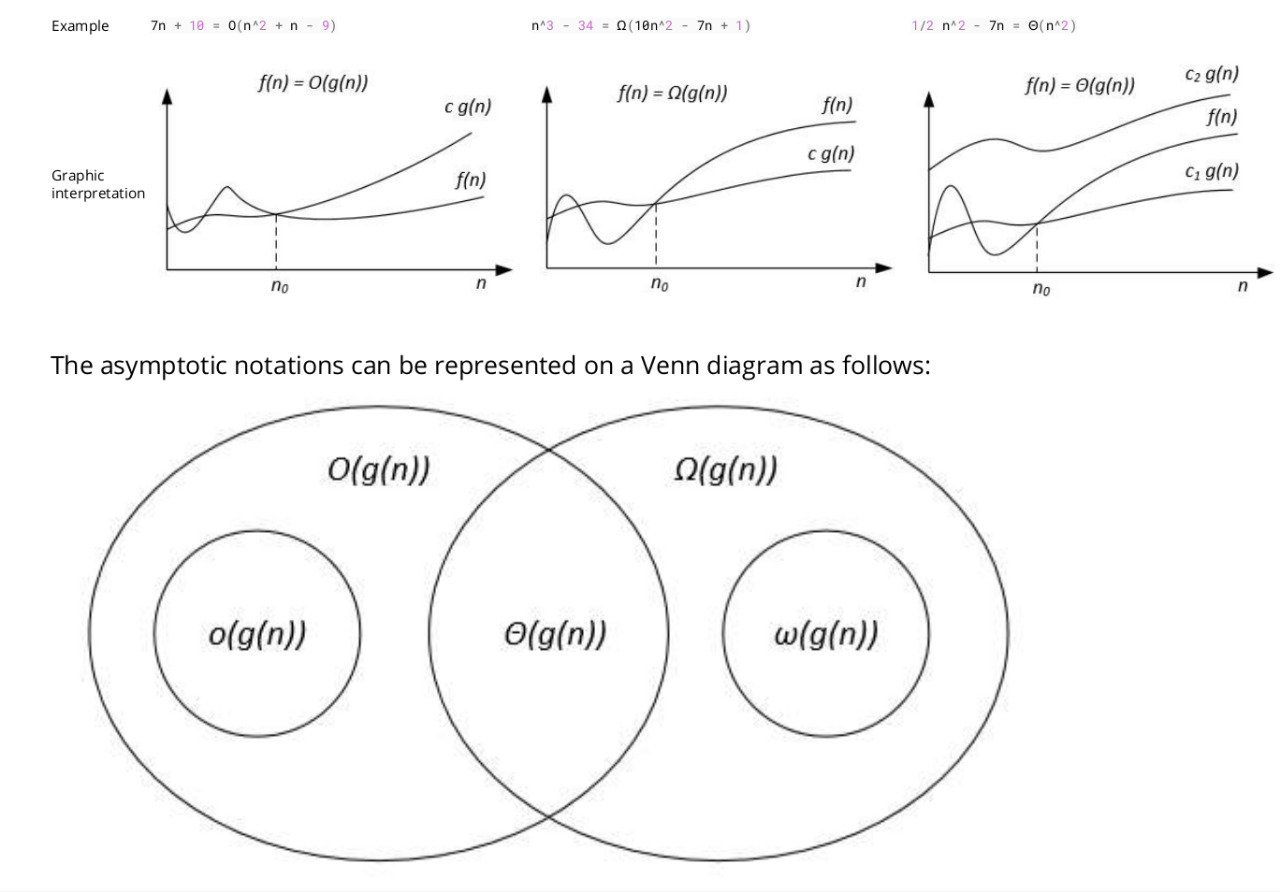

In [11]:
from IPython.display import Image
Image("Images/ord.jpeg")


Sean $f (n)$ y $g(n)$ los tiempos de ejecución de dos algoritmos en entradas de tamaño n.

Sean $f(n)$ y $g(n)$ funciones de reales a reales.

Decimos $f = \mathcal{O}(g)$ (lo que significa que “f no crece más rápido que g”) si hay una constante C > 0 tal que $ f (n) ≤ C · g(n)$ .

Decir $f = \mathcal{O}(g)$ es una analogía muy vaga de "f ≤ g".

Difiere de la noción habitual de $\leq$ debido a la constante C, de modo que, por ejemplo, $10n = \mathcal{O}(n)$.

Esta constante también nos permite ignorar lo que sucede para valores pequeños de n.

Por ejemplo, supongamos que estamos eligiendo entre dos algoritmos para una tarea computacional particular.
Uno toma $f 1 (n) = n^2$ pasos, mientras que el otro toma $f 2 (n) = 2n + 20$ pasos.

¿Cual es mejor?

Esto depende del valor de n. Para $n \leq 5$, $f 1$ es menor; a partir de entonces, $f 2$ es el claro ganador. En este caso, $f 2$ escala mucho mejor a medida que crece n, y por lo tanto es superior.
Esta superioridad es capturada por la notación O grande: $f 2 = \mathcal{O}(f 1 )$, porque

$$\frac{f_2(n)}{f_1(n)} =\frac{2n+20}{n^2}\leq 22$$

para todo n; por otro lado, $f 1 \neq \mathcal{O}(f 2 )$, ya que la razón $f 1 (n)/f 2 (n) = n^2 /(2n + 20)$ puede obtenerse arbitrariamente grande, por lo que ninguna constante C hará que la definición funcione.

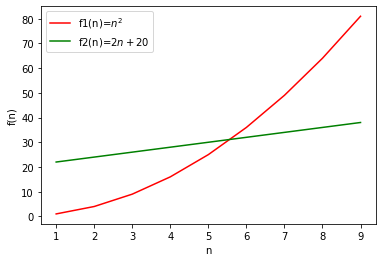

In [12]:
N = np.arange(1,10)
f1 = []
f2 = []

for n in N:
    f1.append(n**2)
    f2.append(2*n+20)


plt.plot(N, f1, color='r', label='f1(n)=$n^2$')
plt.plot(N, f2, color='g', label='f2(n)=$2n+20$')
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("n")
plt.ylabel("f(n)")
plt.legend()
plt.show()

¿Qué pasa con un algoritmo que usa $f 3 (n) = n + 1$ pasos? ¿Es esto mejor que $f 2$? Ciertamente, pero sólo por un factor constante. La discrepancia entre $f 2$ y $f 3$ es pequeña en comparación con la enorme diferencia entre $f 1$ y $f 2$. Para mantenernos enfocados en el panorama general, tratamos las funciones como equivalentes si difieren solo en constantes multiplicativas.
Volviendo a la definición de O grande, vemos que $f 2 = \mathcal{O}(f 3 )$:

$$\frac{f_2(n)}{f_3(n)} =\frac{2n+20}{n+1} =\frac{2(n+1)+18}{n+1}=2+ \frac{18}{n+1}\leq 11,$$


y $f 3 = \mathcal{O}(f 2)$:

$$\frac{f_3(n)}{f_2(n)} =\frac{n+1}{2n+20}\sim \frac{n+1}{2(n+1)}\leq 1$$

Cuando nos enfrentamos a una función complicada como $3n^2 + 4n + 5$, simplemente la reemplazamos con $\mathcal{O}(f (n))$, donde $f (n)$ es lo más simple posible, usaría $\mathcal{O}(n^2 )$, porque la parte cuadrática de la suma domina al resto.